# Pandas Tutorial Concise Version

In [1]:
#!pip   install pandas matplotlib sklearn scipy --user

In [71]:
import numpy
#numpy.__version__

In [72]:
#import pandas

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Object Creation -  Series

Creating a Series by passing a list of values, letting pandas create a default integer index:


class pandas.Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)

One-dimensional ndarray with axis labels (including time series).

Labels need not be unique but must be a hashable type. The object supports both integer- and label-based indexing and provides a host of methods for performing operations involving the index. Statistical methods from ndarray have been overridden to automatically exclude missing data (currently represented as NaN).

Operations between Series (+, -, /, , *) align values based on their associated index values– they need not be the same length. The result index will be the sorted union of the two indexes.
    
Parameters:	

data : array-like, dict, or scalar value: Contains data stored in Series

index : array-like or Index (1d): Values must be hashable and have the same length as data. Non-unique index values are allowed. Will default to RangeIndex(len(data)) if not provided. If both a dict and index sequence are used, the index will override the keys found in the dict.

dtype : numpy.dtype or None: If None, dtype will be inferred

copy : boolean, default False: Copy input data


For more refer: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html#pandas.Series


In [74]:
?pd.Series

In [75]:
s = pd.Series(data=[1,3,5, 6,8], name="myseries", dtype=np.float32)
s

0    1.0
1    3.0
2    5.0
3    6.0
4    8.0
Name: myseries, dtype: float32

In [76]:
type(s)

pandas.core.series.Series

In [77]:
 pd.Series(data=np.arange(10))

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

In [78]:
s = pd.Series([1,3,5,np.nan, 6,8])

In [79]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [80]:
ind1=["India","Pakistan","Bangladesh","Srilanka","China","Nepal"]

s2 = pd.Series(data=[1,3,5,np.nan,6,8], index=ind1, name="myseries")
print(s2)

India         1.0
Pakistan      3.0
Bangladesh    5.0
Srilanka      NaN
China         6.0
Nepal         8.0
Name: myseries, dtype: float64


In [81]:
s2.index

Index(['India', 'Pakistan', 'Bangladesh', 'Srilanka', 'China', 'Nepal'], dtype='object')

In [82]:
s2.values

array([ 1.,  3.,  5., nan,  6.,  8.])

In [83]:
s2.name

'myseries'

In [84]:
type(s2.index)

pandas.core.indexes.base.Index

## Object Creation - DataFrame

pandas.DataFrame

class pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)

Two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). Arithmetic operations align on both row and column labels. Can be thought of as a dict-like container for Series objects. The primary pandas data structure
    
  
Parameters:	

data : numpy ndarray (structured or homogeneous), dict, or DataFrame: Dict can contain Series, arrays, constants, or list-like objects

index : Index or array-like: Index to use for resulting frame. Will default to np.arange(n) if no indexing information part of input data and no index provided

columns : Index or array-like: Column labels to use for resulting frame. Will default to np.arange(n) if no column labels are provided

dtype : dtype, default None: Data type to force. Only a single dtype is allowed. If None, infer

copy : boolean, default False: Copy data from inputs. Only affects DataFrame / 2d ndarray input

For more refer: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame


Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [85]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [86]:
np.random.randn(6,4)

array([[-0.0256227 , -0.80776448, -1.09746405, -0.46965965],
       [ 1.37254019, -1.97854995, -0.11782726,  1.1679694 ],
       [ 0.41481685, -0.09688098, -0.89517848,  0.57674865],
       [ 0.14233164,  0.51191882, -0.17589186, -0.52778907],
       [ 0.82420126,  0.17789168, -0.79327727, -1.3889476 ],
       [-1.6539378 ,  0.49247953,  0.05280423,  1.11277962]])

In [87]:
list('ABCD')

['A', 'B', 'C', 'D']

In [88]:
?pd.DataFrame

In [89]:
df = pd.DataFrame(data=np.random.randn(6,4), index=dates,columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.312851,0.540862,0.279680,1.233861
2013-01-02,1.286976,0.587120,1.805363,-0.615997
2013-01-03,2.139396,0.876003,0.308157,-0.328186
2013-01-04,0.494930,1.274901,-0.317435,-0.193408
2013-01-05,-0.271722,-0.007324,-0.404277,0.314469
2013-01-06,-0.320006,-0.516964,-0.302451,0.489650


In [90]:
dict1={'a':"john",'b':[0,1,1], "c":["foo","bar","bar"]}

In [91]:
df01=pd.DataFrame(dict1)

In [92]:
df01

,a,b,c
0,john,0,foo
1,john,1,bar
2,john,1,bar


In [93]:
#pd.Series(1,index=list(range(4)),dtype='float32')

Creating a `DataFrame` by passing a dict of objects that can be converted to series-like.

In [94]:
import pandas as pd
import numpy as np
df2 = pd.DataFrame(data={'A' : 1,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })

In [95]:
pd.Series(1,index=list(range(1,5)),dtype='float32')

1    1.0
2    1.0
3    1.0
4    1.0
dtype: float32

In [96]:
df2

,A,B,C,D,E,F
0,1,2013-01-02,1.0,3,test,foo
1,1,2013-01-02,1.0,3,train,foo
2,1,2013-01-02,1.0,3,test,foo
3,1,2013-01-02,1.0,3,train,foo


Having specific [dtypes](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes)

In [97]:
df2.dtypes

A             int64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

In [98]:
#df2.

```
df2.<TAB>

df2.A                  df2.boxplot
df2.abs                df2.C
df2.add                df2.clip
df2.add_prefix         df2.clip_lower
df2.add_suffix         df2.clip_upper
df2.align              df2.columns
df2.all                df2.combine
df2.any                df2.combineAdd
df2.append             df2.combine_first
df2.apply              df2.combineMult
df2.applymap           df2.compound
df2.as_blocks          df2.consolidate
df2.asfreq             df2.convert_objects
df2.as_matrix          df2.copy
df2.astype             df2.corr
df2.at                 df2.corrwith
df2.at_time            df2.count
df2.axes               df2.cov
df2.B                  df2.cummax
df2.between_time       df2.cummin
df2.bfill              df2.cumprod
df2.blocks             df2.cumsum
df2.bool               df2.D
```

As you can see, the columns A, B, C, and D are automatically tab completed. E is there as well; the rest of the attributes have been truncated for brevity.

## Viewing Data

Seeing the top & bottom rows of the frame

In [99]:
df.head()

,A,B,C,D
2013-01-01,-0.312851,0.540862,0.279680,1.233861
2013-01-02,1.286976,0.587120,1.805363,-0.615997
2013-01-03,2.139396,0.876003,0.308157,-0.328186
2013-01-04,0.494930,1.274901,-0.317435,-0.193408
2013-01-05,-0.271722,-0.007324,-0.404277,0.314469


In [100]:
df.tail(2)

,A,B,C,D
2013-01-05,-0.271722,-0.007324,-0.404277,0.314469
2013-01-06,-0.320006,-0.516964,-0.302451,0.489650


In [101]:
df

,A,B,C,D
2013-01-01,-0.312851,0.540862,0.279680,1.233861
2013-01-02,1.286976,0.587120,1.805363,-0.615997
2013-01-03,2.139396,0.876003,0.308157,-0.328186
2013-01-04,0.494930,1.274901,-0.317435,-0.193408
2013-01-05,-0.271722,-0.007324,-0.404277,0.314469
2013-01-06,-0.320006,-0.516964,-0.302451,0.489650


Display the index, columns, and the underlying numpy data

In [102]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [103]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [104]:
df.values

array([[-0.31285051,  0.54086236,  0.27967979,  1.23386137],
       [ 1.28697612,  0.58712017,  1.80536251, -0.61599731],
       [ 2.13939611,  0.87600257,  0.30815678, -0.32818599],
       [ 0.49493024,  1.27490127, -0.3174348 , -0.19340823],
       [-0.27172219, -0.00732365, -0.40427737,  0.31446889],
       [-0.32000569, -0.51696373, -0.30245137,  0.4896502 ]])

Describe shows a quick statistic summary of your data

In [105]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.502787,0.459100,0.228173,0.150065
std,1.023291,0.637599,0.833765,0.670897
min,-0.320006,-0.516964,-0.404277,-0.615997
25%,-0.302568,0.129723,-0.313689,-0.294492
50%,0.111604,0.563991,-0.011386,0.060530
75%,1.088965,0.803782,0.301038,0.445855
max,2.139396,1.274901,1.805363,1.233861


In [106]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   A       4 non-null      int64         
 1   B       4 non-null      datetime64[ns]
 2   C       4 non-null      float32       
 3   D       4 non-null      int32         
 4   E       4 non-null      category      
 5   F       4 non-null      object        
dtypes: category(1), datetime64[ns](1), float32(1), int32(1), int64(1), object(1)
memory usage: 260.0+ bytes


In [107]:
df2.describe()

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


Transposing your data

In [108]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.312851,1.286976,2.139396,0.494930,-0.271722,-0.320006
B,0.540862,0.587120,0.876003,1.274901,-0.007324,-0.516964
C,0.279680,1.805363,0.308157,-0.317435,-0.404277,-0.302451
D,1.233861,-0.615997,-0.328186,-0.193408,0.314469,0.489650


In [109]:
df

,A,B,C,D
2013-01-01,-0.312851,0.540862,0.279680,1.233861
2013-01-02,1.286976,0.587120,1.805363,-0.615997
2013-01-03,2.139396,0.876003,0.308157,-0.328186
2013-01-04,0.494930,1.274901,-0.317435,-0.193408
2013-01-05,-0.271722,-0.007324,-0.404277,0.314469
2013-01-06,-0.320006,-0.516964,-0.302451,0.489650


Sorting by an axis

In [110]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [111]:
df.sort_index(axis=0, ascending=False)

,A,B,C,D
2013-01-06,-0.320006,-0.516964,-0.302451,0.489650
2013-01-05,-0.271722,-0.007324,-0.404277,0.314469
2013-01-04,0.494930,1.274901,-0.317435,-0.193408
2013-01-03,2.139396,0.876003,0.308157,-0.328186
2013-01-02,1.286976,0.587120,1.805363,-0.615997
2013-01-01,-0.312851,0.540862,0.279680,1.233861


In [112]:
df

,A,B,C,D
2013-01-01,-0.312851,0.540862,0.279680,1.233861
2013-01-02,1.286976,0.587120,1.805363,-0.615997
2013-01-03,2.139396,0.876003,0.308157,-0.328186
2013-01-04,0.494930,1.274901,-0.317435,-0.193408
2013-01-05,-0.271722,-0.007324,-0.404277,0.314469
2013-01-06,-0.320006,-0.516964,-0.302451,0.489650


In [113]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,1.233861,0.279680,0.540862,-0.312851
2013-01-02,-0.615997,1.805363,0.587120,1.286976
2013-01-03,-0.328186,0.308157,0.876003,2.139396
2013-01-04,-0.193408,-0.317435,1.274901,0.494930
2013-01-05,0.314469,-0.404277,-0.007324,-0.271722
2013-01-06,0.489650,-0.302451,-0.516964,-0.320006


In [251]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.279680,5,NaN
2013-01-02,1.286976,5871.201672,1.805363,5,1.0
2013-01-03,2.139396,8760.025681,0.308157,5,2.0
2013-01-04,0.494930,12749.012704,-0.317435,5,3.0
2013-01-05,-0.271722,-73.236451,-0.404277,5,4.0
2013-01-06,-0.320006,-5169.637261,-0.302451,5,5.0


In [114]:
#df.sort_values

In [252]:
df.sort_values(by='A' , ascending=True)

,A,B,C,D,F
2013-01-06,-0.320006,-5169.637261,-0.302451,5,5.0
2013-01-05,-0.271722,-73.236451,-0.404277,5,4.0
2013-01-01,0.000000,0.000000,0.279680,5,NaN
2013-01-04,0.494930,12749.012704,-0.317435,5,3.0
2013-01-02,1.286976,5871.201672,1.805363,5,1.0
2013-01-03,2.139396,8760.025681,0.308157,5,2.0


In [116]:
df

,A,B,C,D
2013-01-01,-0.312851,0.540862,0.279680,1.233861
2013-01-02,1.286976,0.587120,1.805363,-0.615997
2013-01-03,2.139396,0.876003,0.308157,-0.328186
2013-01-04,0.494930,1.274901,-0.317435,-0.193408
2013-01-05,-0.271722,-0.007324,-0.404277,0.314469
2013-01-06,-0.320006,-0.516964,-0.302451,0.489650


Sorting by values

In [255]:
df["X"]=[1,1,1,2,2,2]
df

,A,B,C,D,F,X
2013-01-01,0.000000,0.000000,0.279680,5,NaN,1
2013-01-02,1.286976,5871.201672,1.805363,5,1.0,1
2013-01-03,2.139396,8760.025681,0.308157,5,2.0,1
2013-01-04,0.494930,12749.012704,-0.317435,5,3.0,2
2013-01-05,-0.271722,-73.236451,-0.404277,5,4.0,2
2013-01-06,-0.320006,-5169.637261,-0.302451,5,5.0,2


In [257]:
df.sort_values(by=['X', 'B'] , ascending=[False, True])

,A,B,C,D,F,X
2013-01-06,-0.320006,-5169.637261,-0.302451,5,5.0,2
2013-01-05,-0.271722,-73.236451,-0.404277,5,4.0,2
2013-01-04,0.494930,12749.012704,-0.317435,5,3.0,2
2013-01-01,0.000000,0.000000,0.279680,5,NaN,1
2013-01-02,1.286976,5871.201672,1.805363,5,1.0,1
2013-01-03,2.139396,8760.025681,0.308157,5,2.0,1


In [118]:
df.sort_values(by=['A', 'B'] , ascending=[True, False], inplace=True)

In [119]:
#df=df.sort_values(by='B' , ascending=False, inplace=False)

In [120]:
pd.__version__

'1.0.5'

In [121]:
?df.sort_values

In [122]:
dates[0]

Timestamp('2013-01-01 00:00:00', freq='D')

In [123]:
df.sort_values(by=dates[0] , axis=1 ,ascending=False, inplace=False)

,D,B,C,A
2013-01-06,0.489650,-0.516964,-0.302451,-0.320006
2013-01-01,1.233861,0.540862,0.279680,-0.312851
2013-01-05,0.314469,-0.007324,-0.404277,-0.271722
2013-01-04,-0.193408,1.274901,-0.317435,0.494930
2013-01-02,-0.615997,0.587120,1.805363,1.286976
2013-01-03,-0.328186,0.876003,0.308157,2.139396


In [124]:
df.sort_values(by="20130101" , axis=1 ,ascending=False, inplace=False)

ValueError: The index label '20130101' is not unique.

In [125]:
df

,A,B,C,D
2013-01-06,-0.320006,-0.516964,-0.302451,0.489650
2013-01-01,-0.312851,0.540862,0.279680,1.233861
2013-01-05,-0.271722,-0.007324,-0.404277,0.314469
2013-01-04,0.494930,1.274901,-0.317435,-0.193408
2013-01-02,1.286976,0.587120,1.805363,-0.615997
2013-01-03,2.139396,0.876003,0.308157,-0.328186


## Selection

**Note:** While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, the optimized pandas data access methods, `.at`, `.iat`, `.loc`, `.iloc` and `.ix` are recommended.

See the indexing documentation [Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and [MultiIndex / Advanced Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

### Getting

Selecting a single column, which yields a `Series`, equivalent to `df.A`

In [126]:
df.sort_index(inplace=True)
df

,A,B,C,D
2013-01-01,-0.312851,0.540862,0.279680,1.233861
2013-01-02,1.286976,0.587120,1.805363,-0.615997
2013-01-03,2.139396,0.876003,0.308157,-0.328186
2013-01-04,0.494930,1.274901,-0.317435,-0.193408
2013-01-05,-0.271722,-0.007324,-0.404277,0.314469
2013-01-06,-0.320006,-0.516964,-0.302451,0.489650


In [127]:
df.A

2013-01-01   -0.312851
2013-01-02    1.286976
2013-01-03    2.139396
2013-01-04    0.494930
2013-01-05   -0.271722
2013-01-06   -0.320006
Name: A, dtype: float64

In [128]:
df['A']

2013-01-01   -0.312851
2013-01-02    1.286976
2013-01-03    2.139396
2013-01-04    0.494930
2013-01-05   -0.271722
2013-01-06   -0.320006
Name: A, dtype: float64

In [129]:
type(df["A"])

pandas.core.series.Series

In [130]:
df

,A,B,C,D
2013-01-01,-0.312851,0.540862,0.279680,1.233861
2013-01-02,1.286976,0.587120,1.805363,-0.615997
2013-01-03,2.139396,0.876003,0.308157,-0.328186
2013-01-04,0.494930,1.274901,-0.317435,-0.193408
2013-01-05,-0.271722,-0.007324,-0.404277,0.314469
2013-01-06,-0.320006,-0.516964,-0.302451,0.489650


Selecting via [], which slices the rows.

In [131]:
df[:3]

,A,B,C,D
2013-01-01,-0.312851,0.540862,0.279680,1.233861
2013-01-02,1.286976,0.587120,1.805363,-0.615997
2013-01-03,2.139396,0.876003,0.308157,-0.328186


In [132]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,1.286976,0.587120,1.805363,-0.615997
2013-01-03,2.139396,0.876003,0.308157,-0.328186
2013-01-04,0.494930,1.274901,-0.317435,-0.193408


In [133]:
pd.__version__

'1.0.5'

In [134]:
# df['20130104'] #works with'0.25.2' or above

In [135]:
df[0::2]

,A,B,C,D
2013-01-01,-0.312851,0.540862,0.279680,1.233861
2013-01-03,2.139396,0.876003,0.308157,-0.328186
2013-01-05,-0.271722,-0.007324,-0.404277,0.314469


### Selecting by Label

See more in [Selection by Label](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-label)

For getting a cross section using a label

In [136]:
?df.loc

In [137]:
dates[0]

Timestamp('2013-01-01 00:00:00', freq='D')

In [138]:
dates[0:4]

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04'], dtype='datetime64[ns]', freq='D')

In [139]:
df.loc[dates[0:4]]

,A,B,C,D
2013-01-01,-0.312851,0.540862,0.279680,1.233861
2013-01-02,1.286976,0.587120,1.805363,-0.615997
2013-01-03,2.139396,0.876003,0.308157,-0.328186
2013-01-04,0.494930,1.274901,-0.317435,-0.193408


In [140]:
#df.loc[dates[1],['C']]

Selecting on a multi-axis by label

In [141]:
df.loc[:,'A']

2013-01-01   -0.312851
2013-01-02    1.286976
2013-01-03    2.139396
2013-01-04    0.494930
2013-01-05   -0.271722
2013-01-06   -0.320006
Name: A, dtype: float64

Showing label slicing, both endpoints are included

In [142]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,1.286976,0.587120
2013-01-03,2.139396,0.876003
2013-01-04,0.494930,1.274901


Reduction in the dimensions of the returned object

In [143]:
df.loc['20130102',['A','B']]

A    1.286976
B    0.587120
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value

In [144]:
df.loc[dates[0],'A']

-0.3128505082880235

In [145]:
df

,A,B,C,D
2013-01-01,-0.312851,0.540862,0.279680,1.233861
2013-01-02,1.286976,0.587120,1.805363,-0.615997
2013-01-03,2.139396,0.876003,0.308157,-0.328186
2013-01-04,0.494930,1.274901,-0.317435,-0.193408
2013-01-05,-0.271722,-0.007324,-0.404277,0.314469
2013-01-06,-0.320006,-0.516964,-0.302451,0.489650


For getting fast access to a scalar (equiv to the prior method)

In [146]:
df.loc[dates[0],'A']

-0.3128505082880235

In [147]:
df.at[dates[0],'A']

-0.3128505082880235

### Selection by position

Pandas provides a suite of methods in order to get purely integer based indexing. The semantics follow closely python and numpy slicing. These are 0-based indexing. When slicing, the start bounds is included, while the upper bound is excluded. Trying to use a non-integer, even a valid label will raise an IndexError.

The .iloc attribute is the primary access method. The following are valid inputs:

    An integer e.g. 5
    A list or array of integers [4, 3, 0]
    A slice object with ints 1:7
    A boolean array
    A callable, see Selection By Callable


In [148]:
df

,A,B,C,D
2013-01-01,-0.312851,0.540862,0.279680,1.233861
2013-01-02,1.286976,0.587120,1.805363,-0.615997
2013-01-03,2.139396,0.876003,0.308157,-0.328186
2013-01-04,0.494930,1.274901,-0.317435,-0.193408
2013-01-05,-0.271722,-0.007324,-0.404277,0.314469
2013-01-06,-0.320006,-0.516964,-0.302451,0.489650


Select via the position of the passed integers

In [149]:
df.iloc[3]

A    0.494930
B    1.274901
C   -0.317435
D   -0.193408
Name: 2013-01-04 00:00:00, dtype: float64

In [150]:
type(df.iloc[3])

pandas.core.series.Series

In [151]:
df.iloc[3:]

,A,B,C,D
2013-01-04,0.494930,1.274901,-0.317435,-0.193408
2013-01-05,-0.271722,-0.007324,-0.404277,0.314469
2013-01-06,-0.320006,-0.516964,-0.302451,0.489650


By integer slices, acting similar to numpy/python

In [152]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.494930,1.274901
2013-01-05,-0.271722,-0.007324


By lists of integer position locations, similar to the numpy/python style

In [153]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,1.286976,1.805363
2013-01-03,2.139396,0.308157
2013-01-05,-0.271722,-0.404277


For slicing rows explicitly

In [154]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,1.286976,0.587120,1.805363,-0.615997
2013-01-03,2.139396,0.876003,0.308157,-0.328186


For slicing columns explicitly

In [155]:
df.iloc[:,1:3]

,B,C
2013-01-01,0.540862,0.279680
2013-01-02,0.587120,1.805363
2013-01-03,0.876003,0.308157
2013-01-04,1.274901,-0.317435
2013-01-05,-0.007324,-0.404277
2013-01-06,-0.516964,-0.302451


In [156]:
df

,A,B,C,D
2013-01-01,-0.312851,0.540862,0.279680,1.233861
2013-01-02,1.286976,0.587120,1.805363,-0.615997
2013-01-03,2.139396,0.876003,0.308157,-0.328186
2013-01-04,0.494930,1.274901,-0.317435,-0.193408
2013-01-05,-0.271722,-0.007324,-0.404277,0.314469
2013-01-06,-0.320006,-0.516964,-0.302451,0.489650


For getting a value explicitly

In [157]:
df.iloc[1,1]

0.5871201671971592

For getting fast access to a scalar (equiv to the prior method)

In [158]:
df.iat[1,1]

0.5871201671971592

In [159]:
#df.ix[1,1]

### Boolean Indexing

Using a single column’s values to select data.

In [160]:
df

,A,B,C,D
2013-01-01,-0.312851,0.540862,0.279680,1.233861
2013-01-02,1.286976,0.587120,1.805363,-0.615997
2013-01-03,2.139396,0.876003,0.308157,-0.328186
2013-01-04,0.494930,1.274901,-0.317435,-0.193408
2013-01-05,-0.271722,-0.007324,-0.404277,0.314469
2013-01-06,-0.320006,-0.516964,-0.302451,0.489650


In [161]:
df.A > 0

2013-01-01    False
2013-01-02     True
2013-01-03     True
2013-01-04     True
2013-01-05    False
2013-01-06    False
Name: A, dtype: bool

In [162]:
df[df.A > 0]

,A,B,C,D
2013-01-02,1.286976,0.587120,1.805363,-0.615997
2013-01-03,2.139396,0.876003,0.308157,-0.328186
2013-01-04,0.494930,1.274901,-0.317435,-0.193408


In [163]:
True | True

True

In [164]:
df[(df.A > 0) & (df.B>-1)]

,A,B,C,D
2013-01-02,1.286976,0.587120,1.805363,-0.615997
2013-01-03,2.139396,0.876003,0.308157,-0.328186
2013-01-04,0.494930,1.274901,-0.317435,-0.193408


In [165]:
df[(df.A > 0) | (df.B>-1)]

,A,B,C,D
2013-01-01,-0.312851,0.540862,0.279680,1.233861
2013-01-02,1.286976,0.587120,1.805363,-0.615997
2013-01-03,2.139396,0.876003,0.308157,-0.328186
2013-01-04,0.494930,1.274901,-0.317435,-0.193408
2013-01-05,-0.271722,-0.007324,-0.404277,0.314469
2013-01-06,-0.320006,-0.516964,-0.302451,0.489650


A `where` operation for getting.

In [166]:
df > 0

,A,B,C,D
2013-01-01,False,True,True,True
2013-01-02,True,True,True,False
2013-01-03,True,True,True,False
2013-01-04,True,True,False,False
2013-01-05,False,False,False,True
2013-01-06,False,False,False,True


In [167]:

df.iloc[0,0]=np.nan

df

,A,B,C,D
2013-01-01,NaN,0.540862,0.279680,1.233861
2013-01-02,1.286976,0.587120,1.805363,-0.615997
2013-01-03,2.139396,0.876003,0.308157,-0.328186
2013-01-04,0.494930,1.274901,-0.317435,-0.193408
2013-01-05,-0.271722,-0.007324,-0.404277,0.314469
2013-01-06,-0.320006,-0.516964,-0.302451,0.489650


In [168]:
df.iloc[0,0]==np.nan

False

In [169]:
np.nan==None

False

In [170]:
np.nan==np.nan

False

In [171]:
np.isnan(np.nan)

True

In [172]:
np.isnan(df.iloc[0,0])

True

In [173]:
np.isnan(df[df > 0].iloc[0,0])

True

In [174]:
df[df > 0].iloc[0,0]

nan

In [175]:
None==None

True

### Using the isin() method for filtering:

Series.isin(values)
Return a boolean Series showing whether each element in the Series is exactly contained in the passed sequence of values.
    
    
Parameters:	

values : set or list-like: The sequence of values to test. Passing in a single string will raise a TypeError. Instead, turn a single string into a list of one element.

  
Returns: isin : Series (bool dtype)

Raises:	TypeError: If values is a string



In [176]:
df

,A,B,C,D
2013-01-01,NaN,0.540862,0.279680,1.233861
2013-01-02,1.286976,0.587120,1.805363,-0.615997
2013-01-03,2.139396,0.876003,0.308157,-0.328186
2013-01-04,0.494930,1.274901,-0.317435,-0.193408
2013-01-05,-0.271722,-0.007324,-0.404277,0.314469
2013-01-06,-0.320006,-0.516964,-0.302451,0.489650


In [177]:
df2 = df.copy()

In [178]:
df2['E'] = ['one', 'one','two','three','four','three']

In [179]:
df2["this is name column"]=["athul", "ujjal", "ayshwer", "binu", "brijesh", "manoj"]

In [180]:
df2

,A,B,C,D,E,this is name column
2013-01-01,NaN,0.540862,0.279680,1.233861,one,athul
2013-01-02,1.286976,0.587120,1.805363,-0.615997,one,ujjal
2013-01-03,2.139396,0.876003,0.308157,-0.328186,two,ayshwer
2013-01-04,0.494930,1.274901,-0.317435,-0.193408,three,binu
2013-01-05,-0.271722,-0.007324,-0.404277,0.314469,four,brijesh
2013-01-06,-0.320006,-0.516964,-0.302451,0.489650,three,manoj


In [181]:
df2['E'].isin(['two','four'])

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Name: E, dtype: bool

In [182]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E,this is name column
2013-01-03,2.139396,0.876003,0.308157,-0.328186,two,ayshwer
2013-01-05,-0.271722,-0.007324,-0.404277,0.314469,four,brijesh


In [183]:
df2[(df2["A"]>1) | (df2['E'].isin(['two','four']))]

,A,B,C,D,E,this is name column
2013-01-02,1.286976,0.587120,1.805363,-0.615997,one,ujjal
2013-01-03,2.139396,0.876003,0.308157,-0.328186,two,ayshwer
2013-01-05,-0.271722,-0.007324,-0.404277,0.314469,four,brijesh


In [184]:
df2[(df2["A"]>1) & (df2['E'].isin(['two','four']))]

,A,B,C,D,E,this is name column
2013-01-03,2.139396,0.876003,0.308157,-0.328186,two,ayshwer


### Setting

Setting a new column automatically aligns the data by the indexes

In [185]:
df

,A,B,C,D
2013-01-01,NaN,0.540862,0.279680,1.233861
2013-01-02,1.286976,0.587120,1.805363,-0.615997
2013-01-03,2.139396,0.876003,0.308157,-0.328186
2013-01-04,0.494930,1.274901,-0.317435,-0.193408
2013-01-05,-0.271722,-0.007324,-0.404277,0.314469
2013-01-06,-0.320006,-0.516964,-0.302451,0.489650


In [186]:
#df=df.sort_index(ascending=False)

In [187]:
#df.sort_index(inplace=True, ascending=False)
#df

In [188]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))

In [189]:
pd.date_range('20130102', periods=6)

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-05',
               '2013-01-06', '2013-01-07'],
              dtype='datetime64[ns]', freq='D')

In [190]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [191]:
df['F'] = s1

In [192]:
df

,A,B,C,D,F
2013-01-01,NaN,0.540862,0.279680,1.233861,NaN
2013-01-02,1.286976,0.587120,1.805363,-0.615997,1.0
2013-01-03,2.139396,0.876003,0.308157,-0.328186,2.0
2013-01-04,0.494930,1.274901,-0.317435,-0.193408,3.0
2013-01-05,-0.271722,-0.007324,-0.404277,0.314469,4.0
2013-01-06,-0.320006,-0.516964,-0.302451,0.489650,5.0


Setting values by label

In [193]:
df.at[dates[0],'A'] =0
df

,A,B,C,D,F
2013-01-01,0.000000,0.540862,0.279680,1.233861,NaN
2013-01-02,1.286976,0.587120,1.805363,-0.615997,1.0
2013-01-03,2.139396,0.876003,0.308157,-0.328186,2.0
2013-01-04,0.494930,1.274901,-0.317435,-0.193408,3.0
2013-01-05,-0.271722,-0.007324,-0.404277,0.314469,4.0
2013-01-06,-0.320006,-0.516964,-0.302451,0.489650,5.0


Setting values by position

In [194]:
df.iat[0,1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.279680,1.233861,NaN
2013-01-02,1.286976,0.587120,1.805363,-0.615997,1.0
2013-01-03,2.139396,0.876003,0.308157,-0.328186,2.0
2013-01-04,0.494930,1.274901,-0.317435,-0.193408,3.0
2013-01-05,-0.271722,-0.007324,-0.404277,0.314469,4.0
2013-01-06,-0.320006,-0.516964,-0.302451,0.489650,5.0


Setting by assigning with a numpy array

In [195]:
len(df)

6

In [196]:
np.array([5] * len(df))

array([5, 5, 5, 5, 5, 5])

In [197]:
df.loc[:,'D'] = np.array([5] * len(df))

The result of the prior setting operations

In [198]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.279680,5,NaN
2013-01-02,1.286976,0.587120,1.805363,5,1.0
2013-01-03,2.139396,0.876003,0.308157,5,2.0
2013-01-04,0.494930,1.274901,-0.317435,5,3.0
2013-01-05,-0.271722,-0.007324,-0.404277,5,4.0
2013-01-06,-0.320006,-0.516964,-0.302451,5,5.0


A `where` operation with setting.

## Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. 

By “missing” we simply mean NA (“not available”) or “not present for whatever reason”. Many data sets simply arrive with missing data, either because it exists and was not collected or it never existed. For example, in a collection of financial time series, some of the time series might start on different dates. Thus, values prior to the start date would generally be marked as missing.

In pandas, one of the most common ways that missing data is introduced into a data set is by reindexing.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [199]:
df.sort_index(inplace=True)

In [200]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.279680,5,NaN
2013-01-02,1.286976,0.587120,1.805363,5,1.0
2013-01-03,2.139396,0.876003,0.308157,5,2.0
2013-01-04,0.494930,1.274901,-0.317435,5,3.0
2013-01-05,-0.271722,-0.007324,-0.404277,5,4.0
2013-01-06,-0.320006,-0.516964,-0.302451,5,5.0


In [201]:
'''df = pd.DataFrame(np.random.randn(6,4), index=dates,columns=list('ABCD'))
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
df["F"]=s1'''


'df = pd.DataFrame(np.random.randn(6,4), index=dates,columns=list(\'ABCD\'))\ns1 = pd.Series([1,2,3,4,5,6], index=pd.date_range(\'20130102\', periods=6))\ndf["F"]=s1'

In [202]:
?df.reindex

In [203]:
list(df.columns) +["E"]

['A', 'B', 'C', 'D', 'F', 'E']

In [204]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [205]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.279680,5,NaN
2013-01-02,1.286976,0.587120,1.805363,5,1.0
2013-01-03,2.139396,0.876003,0.308157,5,2.0
2013-01-04,0.494930,1.274901,-0.317435,5,3.0
2013-01-05,-0.271722,-0.007324,-0.404277,5,4.0
2013-01-06,-0.320006,-0.516964,-0.302451,5,5.0


In [206]:
df.columns

Index(['A', 'B', 'C', 'D', 'F'], dtype='object')

In [207]:
#df.reindex(index=range(6), columns=list(df.columns) + ['E'])

In [208]:
dates[0:4]

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04'], dtype='datetime64[ns]', freq='D')

In [209]:
dates3=pd.date_range("20130101", periods=7)

In [217]:
df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.279680,5,NaN,NaN
2013-01-02,1.286976,0.587120,1.805363,5,1.0,NaN
2013-01-03,2.139396,0.876003,0.308157,5,2.0,NaN
2013-01-04,0.494930,1.274901,-0.317435,5,3.0,NaN


In [218]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.279680,5,NaN
2013-01-02,1.286976,0.587120,1.805363,5,1.0
2013-01-03,2.139396,0.876003,0.308157,5,2.0
2013-01-04,0.494930,1.274901,-0.317435,5,3.0
2013-01-05,-0.271722,-0.007324,-0.404277,5,4.0
2013-01-06,-0.320006,-0.516964,-0.302451,5,5.0


In [219]:
df1=df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.279680,5,NaN,NaN
2013-01-02,1.286976,0.587120,1.805363,5,1.0,NaN
2013-01-03,2.139396,0.876003,0.308157,5,2.0,NaN
2013-01-04,0.494930,1.274901,-0.317435,5,3.0,NaN


In [220]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [221]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.279680,5,NaN,1.0
2013-01-02,1.286976,0.587120,1.805363,5,1.0,1.0
2013-01-03,2.139396,0.876003,0.308157,5,2.0,NaN
2013-01-04,0.494930,1.274901,-0.317435,5,3.0,NaN


To drop any rows that have missing data.

In [225]:
?df1.dropna

In [226]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,1.286976,0.58712,1.805363,5,1.0,1.0


In [227]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.279680,5,NaN,1.0
2013-01-02,1.286976,0.587120,1.805363,5,1.0,1.0
2013-01-03,2.139396,0.876003,0.308157,5,2.0,NaN
2013-01-04,0.494930,1.274901,-0.317435,5,3.0,NaN


In [228]:
df1.dropna(how='any', axis=1)

,A,B,C,D
2013-01-01,0.000000,0.000000,0.279680,5
2013-01-02,1.286976,0.587120,1.805363,5
2013-01-03,2.139396,0.876003,0.308157,5
2013-01-04,0.494930,1.274901,-0.317435,5


In [125]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,1.351203,0.239896,5,NaN,1.0
2013-01-02,-0.079022,-1.117805,0.237695,5,1.0,1.0
2013-01-03,0.520116,0.452025,-0.427301,5,2.0,NaN
2013-01-04,NaN,0.000000,-0.124239,5,3.0,NaN


In [229]:
df3=df.copy()
df3.iloc[1:3,1]=np.nan
df3

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.279680,5,NaN
2013-01-02,1.286976,NaN,1.805363,5,1.0
2013-01-03,2.139396,NaN,0.308157,5,2.0
2013-01-04,0.494930,1.274901,-0.317435,5,3.0
2013-01-05,-0.271722,-0.007324,-0.404277,5,4.0
2013-01-06,-0.320006,-0.516964,-0.302451,5,5.0


In [232]:
df3.fillna(method="bfill")

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.279680,5,1.0
2013-01-02,1.286976,1.274901,1.805363,5,1.0
2013-01-03,2.139396,1.274901,0.308157,5,2.0
2013-01-04,0.494930,1.274901,-0.317435,5,3.0
2013-01-05,-0.271722,-0.007324,-0.404277,5,4.0
2013-01-06,-0.320006,-0.516964,-0.302451,5,5.0


In [233]:
?df3.fillna

In [234]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.279680,5,NaN,1.0
2013-01-02,1.286976,0.587120,1.805363,5,1.0,1.0
2013-01-03,2.139396,0.876003,0.308157,5,2.0,NaN
2013-01-04,0.494930,1.274901,-0.317435,5,3.0,NaN


Filling missin data

In [235]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.279680,5,5.0,1.0
2013-01-02,1.286976,0.587120,1.805363,5,1.0,1.0
2013-01-03,2.139396,0.876003,0.308157,5,2.0,5.0
2013-01-04,0.494930,1.274901,-0.317435,5,3.0,5.0


In [131]:
?df1.fillna

In [238]:
df3

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.279680,5,NaN
2013-01-02,1.286976,NaN,1.805363,5,1.0
2013-01-03,2.139396,NaN,0.308157,5,2.0
2013-01-04,0.494930,1.274901,-0.317435,5,3.0
2013-01-05,-0.271722,-0.007324,-0.404277,5,4.0
2013-01-06,-0.320006,-0.516964,-0.302451,5,5.0


In [237]:
df3.fillna(method="ffill")

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.279680,5,NaN
2013-01-02,1.286976,0.000000,1.805363,5,1.0
2013-01-03,2.139396,0.000000,0.308157,5,2.0
2013-01-04,0.494930,1.274901,-0.317435,5,3.0
2013-01-05,-0.271722,-0.007324,-0.404277,5,4.0
2013-01-06,-0.320006,-0.516964,-0.302451,5,5.0


In [133]:
df3=df.copy()
df3.iloc[1:3,1:3]=np.nan
df3

,A,B,C,D,F
2013-01-01,0.000000,1.351203,0.239896,5,NaN
2013-01-02,-0.079022,NaN,NaN,5,1.0
2013-01-03,0.520116,NaN,NaN,5,2.0
2013-01-04,NaN,0.000000,-0.124239,5,3.0
2013-01-05,-1.751503,0.246934,-1.676786,5,4.0
2013-01-06,-0.318204,0.018773,0.310749,5,5.0


In [134]:
df3.fillna(method="bfill")

,A,B,C,D,F
2013-01-01,0.000000,1.351203,0.239896,5,1.0
2013-01-02,-0.079022,0.000000,-0.124239,5,1.0
2013-01-03,0.520116,0.000000,-0.124239,5,2.0
2013-01-04,-1.751503,0.000000,-0.124239,5,3.0
2013-01-05,-1.751503,0.246934,-1.676786,5,4.0
2013-01-06,-0.318204,0.018773,0.310749,5,5.0


In [135]:
df3

,A,B,C,D,F
2013-01-01,0.000000,1.351203,0.239896,5,NaN
2013-01-02,-0.079022,NaN,NaN,5,1.0
2013-01-03,0.520116,NaN,NaN,5,2.0
2013-01-04,NaN,0.000000,-0.124239,5,3.0
2013-01-05,-1.751503,0.246934,-1.676786,5,4.0
2013-01-06,-0.318204,0.018773,0.310749,5,5.0


In [136]:
df3.fillna(method="ffill")

,A,B,C,D,F
2013-01-01,0.000000,1.351203,0.239896,5,NaN
2013-01-02,-0.079022,1.351203,0.239896,5,1.0
2013-01-03,0.520116,1.351203,0.239896,5,2.0
2013-01-04,0.520116,0.000000,-0.124239,5,3.0
2013-01-05,-1.751503,0.246934,-1.676786,5,4.0
2013-01-06,-0.318204,0.018773,0.310749,5,5.0


In [137]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,True,False,False,False,False,True


To get the boolean mask where values are `nan`

In [138]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,True,False,False,False,False,True


## Operations

Flexible binary operations

With binary operations between pandas data structures, there are two key points of interest:

(a) Broadcasting behavior between higher- (e.g. DataFrame) and lower-dimensional (e.g. Series) objects.

(b) Missing data in computations

Matching / broadcasting behavior

DataFrame has the methods add(), sub(), mul(), div() and related functions radd(), rsub(), etc., for carrying out binary operations. For broadcasting behavior, Series input is of primary interest. Using these functions, you can use to either match on the index or columns via the axis keyword:

In [139]:
df

,A,B,C,D,F
2013-01-01,0.000000,1.351203,0.239896,5,NaN
2013-01-02,-0.079022,-1.117805,0.237695,5,1.0
2013-01-03,0.520116,0.452025,-0.427301,5,2.0
2013-01-04,NaN,0.000000,-0.124239,5,3.0
2013-01-05,-1.751503,0.246934,-1.676786,5,4.0
2013-01-06,-0.318204,0.018773,0.310749,5,5.0


### Stats

Operations in general exclude missing data.

Performing a descriptive statistic

In [140]:
df.mean(axis=0)

A   -0.325723
B    0.158522
C   -0.239998
D    5.000000
F    3.000000
dtype: float64

In [141]:
df.sum(axis=1)

2013-01-01     6.591099
2013-01-02     5.040868
2013-01-03     7.544840
2013-01-04     7.875761
2013-01-05     5.818645
2013-01-06    10.011318
dtype: float64

In [142]:
df.sum(1)

2013-01-01     6.591099
2013-01-02     5.040868
2013-01-03     7.544840
2013-01-04     7.875761
2013-01-05     5.818645
2013-01-06    10.011318
dtype: float64

Same operation on the other axis

In [143]:
df.mean(1)


2013-01-01    1.647775
2013-01-02    1.008174
2013-01-03    1.508968
2013-01-04    1.968940
2013-01-05    1.163729
2013-01-06    2.002264
dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [144]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [145]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [146]:
df

,A,B,C,D,F
2013-01-01,0.000000,1.351203,0.239896,5,NaN
2013-01-02,-0.079022,-1.117805,0.237695,5,1.0
2013-01-03,0.520116,0.452025,-0.427301,5,2.0
2013-01-04,NaN,0.000000,-0.124239,5,3.0
2013-01-05,-1.751503,0.246934,-1.676786,5,4.0
2013-01-06,-0.318204,0.018773,0.310749,5,5.0


In [147]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.479884,-0.547975,-1.427301,4.0,1.0
2013-01-04,NaN,-3.000000,-3.124239,2.0,0.0
2013-01-05,-6.751503,-4.753066,-6.676786,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


In [148]:
?df.sub

In [149]:
df

,A,B,C,D,F
2013-01-01,0.000000,1.351203,0.239896,5,NaN
2013-01-02,-0.079022,-1.117805,0.237695,5,1.0
2013-01-03,0.520116,0.452025,-0.427301,5,2.0
2013-01-04,NaN,0.000000,-0.124239,5,3.0
2013-01-05,-1.751503,0.246934,-1.676786,5,4.0
2013-01-06,-0.318204,0.018773,0.310749,5,5.0


In [150]:
s2 = pd.Series([1,3,5,6,8], index=list("ABCDF"))
s2

A    1
B    3
C    5
D    6
F    8
dtype: int64

In [151]:
df.sub(s2)

,A,B,C,D,F
2013-01-01,-1.000000,-1.648797,-4.760104,-1,NaN
2013-01-02,-1.079022,-4.117805,-4.762305,-1,-7.0
2013-01-03,-0.479884,-2.547975,-5.427301,-1,-6.0
2013-01-04,NaN,-3.000000,-5.124239,-1,-5.0
2013-01-05,-2.751503,-2.753066,-6.676786,-1,-4.0
2013-01-06,-1.318204,-2.981227,-4.689251,-1,-3.0


In [152]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates)

In [241]:
df.B*=100
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.279680,5,NaN
2013-01-02,1.286976,5871.201672,1.805363,5,1.0
2013-01-03,2.139396,8760.025681,0.308157,5,2.0
2013-01-04,0.494930,12749.012704,-0.317435,5,3.0
2013-01-05,-0.271722,-73.236451,-0.404277,5,4.0
2013-01-06,-0.320006,-5169.637261,-0.302451,5,5.0


### Apply

Applying functions to the data

In [153]:
df

,A,B,C,D,F
2013-01-01,0.000000,1.351203,0.239896,5,NaN
2013-01-02,-0.079022,-1.117805,0.237695,5,1.0
2013-01-03,0.520116,0.452025,-0.427301,5,2.0
2013-01-04,NaN,0.000000,-0.124239,5,3.0
2013-01-05,-1.751503,0.246934,-1.676786,5,4.0
2013-01-06,-0.318204,0.018773,0.310749,5,5.0


In [244]:
df.apply(sum)

A        3.329575
B    22137.366345
C        1.369036
D       30.000000
F             NaN
dtype: float64

In [243]:
df.apply(np.sin)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.276048,-0.958924,NaN
2013-01-02,0.959993,0.421408,0.972615,-0.958924,0.841471
2013-01-03,0.842656,0.953717,0.303303,-0.958924,0.909297
2013-01-04,0.474970,0.416612,-0.312131,-0.958924,0.141120
2013-01-05,-0.268391,0.830397,-0.393354,-0.958924,-0.756802
2013-01-06,-0.314572,0.989281,-0.297861,-0.958924,-0.958924


In [247]:
df.apply(lambda x:x**2)

,A,B,C,D,F
2013-01-01,0.000000,0.000000e+00,0.078221,25,NaN
2013-01-02,1.656308,3.447101e+07,3.259334,25,1.0
2013-01-03,4.577016,7.673805e+07,0.094961,25,4.0
2013-01-04,0.244956,1.625373e+08,0.100765,25,9.0
2013-01-05,0.073833,5.363578e+03,0.163440,25,16.0
2013-01-06,0.102404,2.672515e+07,0.091477,25,25.0


In [155]:
df.apply(func=sum,axis=1)

2013-01-01          NaN
2013-01-02     5.040868
2013-01-03     7.544840
2013-01-04          NaN
2013-01-05     5.818645
2013-01-06    10.011318
dtype: float64

In [245]:
?df.apply

In [156]:
np.sin(df.A)


2013-01-01    0.000000
2013-01-02   -0.078940
2013-01-03    0.496981
2013-01-04         NaN
2013-01-05   -0.983717
2013-01-06   -0.312861
Name: A, dtype: float64

In [249]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.279680,5,NaN
2013-01-02,1.286976,5871.201672,1.805363,5,1.0
2013-01-03,2.139396,8760.025681,0.308157,5,2.0
2013-01-04,0.494930,12749.012704,-0.317435,5,3.0
2013-01-05,-0.271722,-73.236451,-0.404277,5,4.0
2013-01-06,-0.320006,-5169.637261,-0.302451,5,5.0


In [248]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.279680,5,NaN
2013-01-02,1.286976,5871.201672,2.085042,10,1.0
2013-01-03,3.426372,14631.227353,2.393199,15,3.0
2013-01-04,3.921302,27380.240057,2.075764,20,6.0
2013-01-05,3.649580,27307.003606,1.671487,25,10.0
2013-01-06,3.329575,22137.366345,1.369036,30,15.0


In [159]:
'''def iterDF(dataFrame01):
    list01=[]
    for i in dataFrame01:
        
        print(i, dataFrame01[i].sum())
        list01.append(dataFrame01[i].sum())
    return 

iterDF(df)
'''
    
        
        

'def iterDF(dataFrame01):\n    list01=[]\n    for i in dataFrame01:\n        \n        print(i, dataFrame01[i].sum())\n        list01.append(dataFrame01[i].sum())\n    return \n\niterDF(df)\n'

In [160]:
df.apply(np.sum, axis=1)

2013-01-01     6.591099
2013-01-02     5.040868
2013-01-03     7.544840
2013-01-04     7.875761
2013-01-05     5.818645
2013-01-06    10.011318
dtype: float64

In [161]:
?df.apply

In [162]:
df

,A,B,C,D,F
2013-01-01,0.000000,1.351203,0.239896,5,NaN
2013-01-02,-0.079022,-1.117805,0.237695,5,1.0
2013-01-03,0.520116,0.452025,-0.427301,5,2.0
2013-01-04,NaN,0.000000,-0.124239,5,3.0
2013-01-05,-1.751503,0.246934,-1.676786,5,4.0
2013-01-06,-0.318204,0.018773,0.310749,5,5.0


In [163]:
df.iloc[:,0].max()- df.iloc[:,0].min()

2.2716188803017863

In [164]:
df.apply(lambda x: x.max() - x.min(), axis=1)

2013-01-01    5.000000
2013-01-02    6.117805
2013-01-03    5.427301
2013-01-04    5.124239
2013-01-05    6.751503
2013-01-06    5.318204
dtype: float64

In [165]:
df.apply(lambda x: x.max() - x.min(), axis=0)

A    2.271619
B    2.469009
C    1.987535
D    0.000000
F    4.000000
dtype: float64

In [166]:

def func(a):
        print( a.max()-a.min())
for i in df.columns:
    func(df[i])
    

        
    

2.2716188803017863
2.46900859059706
1.9875350525020772
0
4.0


In [167]:
df.apply(lambda x:x+1)

,A,B,C,D,F
2013-01-01,1.000000,2.351203,1.239896,6,NaN
2013-01-02,0.920978,-0.117805,1.237695,6,2.0
2013-01-03,1.520116,1.452025,0.572699,6,3.0
2013-01-04,NaN,1.000000,0.875761,6,4.0
2013-01-05,-0.751503,1.246934,-0.676786,6,5.0
2013-01-06,0.681796,1.018773,1.310749,6,6.0


In [168]:
df

,A,B,C,D,F
2013-01-01,0.000000,1.351203,0.239896,5,NaN
2013-01-02,-0.079022,-1.117805,0.237695,5,1.0
2013-01-03,0.520116,0.452025,-0.427301,5,2.0
2013-01-04,NaN,0.000000,-0.124239,5,3.0
2013-01-05,-1.751503,0.246934,-1.676786,5,4.0
2013-01-06,-0.318204,0.018773,0.310749,5,5.0


In [169]:
df.apply(np.sqrt, axis=0)

,A,B,C,D,F
2013-01-01,0.000000,1.162413,0.489792,2.236068,NaN
2013-01-02,NaN,NaN,0.487540,2.236068,1.000000
2013-01-03,0.721191,0.672328,NaN,2.236068,1.414214
2013-01-04,NaN,0.000000,NaN,2.236068,1.732051
2013-01-05,NaN,0.496925,NaN,2.236068,2.000000
2013-01-06,NaN,0.137014,0.557449,2.236068,2.236068


In [170]:
#df.apply(lambda x: x + s, axis=0)

### Histogramming

Value counts (histogramming) / Mode

The value_counts() Series method and top-level function computes a histogram of a 1D array of values. It can also be used as a function on regular arrays.



In [258]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [259]:
s

0    3
1    2
2    4
3    4
4    6
5    0
6    6
7    1
8    1
9    6
dtype: int64

In [261]:
s.value_counts()

6    3
4    2
1    2
3    1
2    1
0    1
dtype: int64

In [262]:
s

0    3
1    2
2    4
3    4
4    6
5    0
6    6
7    1
8    1
9    6
dtype: int64

Continuous values can be discretized using the cut() (bins based on values) and qcut() (bins based on sample quantiles) functions

In [263]:
s

0    3
1    2
2    4
3    4
4    6
5    0
6    6
7    1
8    1
9    6
dtype: int64

In [266]:
factor = pd.cut(s, 5)
factor
#factor.value_counts()

0       (2.4, 3.6]
1       (1.2, 2.4]
2       (3.6, 4.8]
3       (3.6, 4.8]
4       (4.8, 6.0]
5    (-0.006, 1.2]
6       (4.8, 6.0]
7    (-0.006, 1.2]
8    (-0.006, 1.2]
9       (4.8, 6.0]
dtype: category
Categories (5, interval[float64]): [(-0.006, 1.2] < (1.2, 2.4] < (2.4, 3.6] < (3.6, 4.8] < (4.8, 6.0]]

In [267]:
factor.value_counts()

(4.8, 6.0]       3
(-0.006, 1.2]    3
(3.6, 4.8]       2
(2.4, 3.6]       1
(1.2, 2.4]       1
dtype: int64

In [177]:
?pd.cut

### String Methods

Series is equipped with a set of string processing methods in the `str` attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in `str` generally uses [regular expressions](https://docs.python.org/2/library/re.html) by default (and in 
some cases always uses them). See more at [Vectorized String Methods](http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods).

In [268]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [269]:
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [272]:
"datascience".upper()

'DATASCIENCE'

In [273]:
s.str.endswith("A")

0     True
1    False
2    False
3    False
4    False
5      NaN
6     True
7    False
8    False
dtype: object

In [274]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [275]:
s.str.lower().str.endswith("a")

0     True
1    False
2    False
3     True
4     True
5      NaN
6     True
7    False
8    False
dtype: object

In [184]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [185]:
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [186]:
s.str.find("A")

0    0.0
1   -1.0
2   -1.0
3    0.0
4   -1.0
5    NaN
6    1.0
7   -1.0
8   -1.0
dtype: float64

In [187]:
s.str.replace("A", "AAA")

0         AAA
1           B
2           C
3      AAAaba
4        Baca
5         NaN
6    CAAABAAA
7         dog
8         cat
dtype: object

In [188]:
dfSTR=pd.DataFrame({"str1": list("ABCD")   , "str2":list("CDEF") })

In [189]:
dfSTR["str2modif"]=dfSTR["str2"].str.lower()
dfSTR

,str1,str2,str2modif
0,A,C,c
1,B,D,d
2,C,E,e
3,D,F,f


## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

Merge, join, and concatenate: pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.


Concatenating objects: The concat function (in the main pandas namespace) does all of the heavy lifting of performing concatenation operations along an axis while performing optional set logic (union or intersection) of the indexes (if any) on the other axes.

Concatenating pandas objects together with [concat()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html#pandas.concat):

In [14]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randn(10, 4))

In [15]:
df

,0,1,2,3
0,0.946781,-1.475463,0.102267,1.225419
1,-0.458956,0.001300,0.726455,-1.688017
2,0.656732,0.355895,0.556335,1.095040
3,0.709537,-1.589741,0.097680,2.471441
4,0.314926,-0.966215,-0.973645,0.702403
5,-0.188686,-0.372258,0.040537,0.496963
6,0.077331,0.500083,0.472720,0.716224
7,0.495744,-0.480587,0.805836,-0.212111
8,-0.324066,-0.662484,-0.594502,0.718447
9,0.887019,-0.069993,-0.747354,0.488328


In [16]:
df[3:7]

,0,1,2,3
3,0.709537,-1.589741,0.097680,2.471441
4,0.314926,-0.966215,-0.973645,0.702403
5,-0.188686,-0.372258,0.040537,0.496963
6,0.077331,0.500083,0.472720,0.716224


In [17]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [18]:
pieces

[          0         1         2         3
 0  0.946781 -1.475463  0.102267  1.225419
 1 -0.458956  0.001300  0.726455 -1.688017
 2  0.656732  0.355895  0.556335  1.095040,
           0         1         2         3
 3  0.709537 -1.589741  0.097680  2.471441
 4  0.314926 -0.966215 -0.973645  0.702403
 5 -0.188686 -0.372258  0.040537  0.496963
 6  0.077331  0.500083  0.472720  0.716224,
           0         1         2         3
 7  0.495744 -0.480587  0.805836 -0.212111
 8 -0.324066 -0.662484 -0.594502  0.718447
 9  0.887019 -0.069993 -0.747354  0.488328]

In [19]:
pd.concat(pieces)

,0,1,2,3
0,0.946781,-1.475463,0.102267,1.225419
1,-0.458956,0.001300,0.726455,-1.688017
2,0.656732,0.355895,0.556335,1.095040
3,0.709537,-1.589741,0.097680,2.471441
4,0.314926,-0.966215,-0.973645,0.702403
5,-0.188686,-0.372258,0.040537,0.496963
6,0.077331,0.500083,0.472720,0.716224
7,0.495744,-0.480587,0.805836,-0.212111
8,-0.324066,-0.662484,-0.594502,0.718447
9,0.887019,-0.069993,-0.747354,0.488328


In [20]:
pd.concat(pieces, axis=1)

,0,1,2,3,0,1,2,3,0,1,2,3
0,0.946781,-1.475463,0.102267,1.225419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.458956,0.001300,0.726455,-1.688017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.656732,0.355895,0.556335,1.095040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,0.709537,-1.589741,0.097680,2.471441,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,0.314926,-0.966215,-0.973645,0.702403,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,-0.188686,-0.372258,0.040537,0.496963,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,0.077331,0.500083,0.472720,0.716224,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495744,-0.480587,0.805836,-0.212111
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.324066,-0.662484,-0.594502,0.718447
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.887019,-0.069993,-0.747354,0.488328


In [21]:
df

,0,1,2,3
0,0.946781,-1.475463,0.102267,1.225419
1,-0.458956,0.001300,0.726455,-1.688017
2,0.656732,0.355895,0.556335,1.095040
3,0.709537,-1.589741,0.097680,2.471441
4,0.314926,-0.966215,-0.973645,0.702403
5,-0.188686,-0.372258,0.040537,0.496963
6,0.077331,0.500083,0.472720,0.716224
7,0.495744,-0.480587,0.805836,-0.212111
8,-0.324066,-0.662484,-0.594502,0.718447
9,0.887019,-0.069993,-0.747354,0.488328


In [22]:
pieces = {"a":df[:3], "b": df[3:7], "c": df[7:]}
pd.concat(pieces, axis=0)

0         1         2         3
a 0  0.946781 -1.475463  0.102267  1.225419
  1 -0.458956  0.001300  0.726455 -1.688017
  2  0.656732  0.355895  0.556335  1.095040
b 3  0.709537 -1.589741  0.097680  2.471441
  4  0.314926 -0.966215 -0.973645  0.702403
  5 -0.188686 -0.372258  0.040537  0.496963
  6  0.077331  0.500083  0.472720  0.716224
c 7  0.495744 -0.480587  0.805836 -0.212111
  8 -0.324066 -0.662484 -0.594502  0.718447
  9  0.887019 -0.069993 -0.747354  0.488328

### Join

SQL style merges. See the [Database style joining](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join)

In [23]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [24]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [25]:
left

,key,lval
0,foo,1
1,foo,2


In [26]:
right

,key,rval
0,foo,4
1,foo,5


In [27]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Another example that can be given is:

In [28]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})

In [29]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [30]:
left

,key,lval
0,foo,1
1,bar,2


In [31]:
right

,key,rval
0,foo,4
1,bar,5


In [32]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [33]:
?pd.merge

### Append


Append rows to a dataframe. See the [Appending](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation)

In [55]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [56]:
df

,A,B,C,D
0,0.598771,0.654492,-0.573881,-1.330530
1,0.386083,0.093520,0.299498,0.148244
2,0.101055,0.795410,-0.365883,0.972259
3,0.477025,1.015595,0.535475,0.669795
4,0.873077,-0.432912,-1.047811,-0.697537
5,0.745212,-0.739773,-1.165442,2.797824
6,-0.329840,2.445985,-0.218093,0.273908
7,1.124096,-0.612062,1.483983,-0.608833


In [57]:
s = df.iloc[3]

In [58]:
s

A    0.477025
B    1.015595
C    0.535475
D    0.669795
Name: 3, dtype: float64

In [59]:
df=df.append(s, ignore_index=True)
df

,A,B,C,D
0,0.598771,0.654492,-0.573881,-1.330530
1,0.386083,0.093520,0.299498,0.148244
2,0.101055,0.795410,-0.365883,0.972259
3,0.477025,1.015595,0.535475,0.669795
4,0.873077,-0.432912,-1.047811,-0.697537
5,0.745212,-0.739773,-1.165442,2.797824
6,-0.329840,2.445985,-0.218093,0.273908
7,1.124096,-0.612062,1.483983,-0.608833
8,0.477025,1.015595,0.535475,0.669795


In [63]:
df=df.append(s, ignore_index=False)


In [64]:
df

,A,B,C,D
0,0.598771,0.654492,-0.573881,-1.330530
1,0.386083,0.093520,0.299498,0.148244
2,0.101055,0.795410,-0.365883,0.972259
3,0.477025,1.015595,0.535475,0.669795
4,0.873077,-0.432912,-1.047811,-0.697537
5,0.745212,-0.739773,-1.165442,2.797824
6,-0.329840,2.445985,-0.218093,0.273908
7,1.124096,-0.612062,1.483983,-0.608833
8,0.477025,1.015595,0.535475,0.669795
3,0.477025,1.015595,0.535475,0.669795


## Grouping

By “group by” we are referring to a process involving one or more of the following steps

 * **Splitting** the data into groups based on some criteria
 * **Applying** a function to each group independently
 * **Combining** the results into a data structure

See the [Grouping section](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [276]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})

In [282]:
df

,A,B,C,D
0,foo,one,-0.088976,0.896882
1,bar,one,-1.797992,0.704474
2,foo,two,2.502527,1.441254
3,bar,three,0.882135,0.328632
4,foo,two,0.473995,-0.750083
5,bar,two,-0.308624,0.622474
6,foo,one,1.049922,1.448687
7,foo,three,-1.252240,1.051540


Grouping and then applying a function `sum` to the resulting groups.

In [278]:
df.groupby('A').sum()

,C,D
A,,
bar,-1.224482,1.655581
foo,2.685227,4.088279


In [279]:
df.nsmallest(3,"D")

,A,B,C,D
4,foo,two,0.473995,-0.750083
3,bar,three,0.882135,0.328632
5,bar,two,-0.308624,0.622474


In [281]:
df[df.A=="bar"].nlargest(3,"D")

,A,B,C,D
1,bar,one,-1.797992,0.704474
5,bar,two,-0.308624,0.622474
3,bar,three,0.882135,0.328632


In [283]:
df

,A,B,C,D
0,foo,one,-0.088976,0.896882
1,bar,one,-1.797992,0.704474
2,foo,two,2.502527,1.441254
3,bar,three,0.882135,0.328632
4,foo,two,0.473995,-0.750083
5,bar,two,-0.308624,0.622474
6,foo,one,1.049922,1.448687
7,foo,three,-1.252240,1.051540


In [284]:
df.groupby('A').apply(lambda x: x.nlargest(2,"D"))

A    B         C         D
A                                  
bar 1  bar  one -1.797992  0.704474
    5  bar  two -0.308624  0.622474
foo 6  foo  one  1.049922  1.448687
    2  foo  two  2.502527  1.441254

In [85]:
for i in df.groupby('A'):
    print(i)
    print("\n")

('bar',      A      B         C         D
1  bar    one  0.055688 -0.803696
3  bar  three -0.318777  0.173990
5  bar    two -1.041514 -0.674729)


('foo',      A      B         C         D
0  foo    one  1.620740 -0.662487
2  foo    two -2.776705  0.275431
4  foo    two  0.888842  0.103015
6  foo    one -2.064497 -1.024868
7  foo  three -0.097591  0.836759)




In [88]:
df.nlargest(2,"D")

,A,B,C,D
0,foo,one,1.620740,-0.662487
4,foo,two,0.888842,0.103015


Grouping by multiple columns forms a hierarchical index, which we then apply the function.

In [89]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.055688 -0.803696
    three -0.318777  0.173990
    two   -1.041514 -0.674729
foo one   -0.443757 -1.687355
    three -0.097591  0.836759
    two   -1.887864  0.378446

In [96]:
df.groupby(['A','B']).sum().index

MultiIndex(levels=[['bar', 'foo'], ['one', 'three', 'two']],
           codes=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]],
           names=['A', 'B'])

## Reshaping

(a) Hierarchical indexing (MultiIndex)

Hierarchical / Multi-level indexing is very exciting as it opens the door to some quite sophisticated data analysis and manipulation, especially for working with higher dimensional data. In essence, it enables in storing and manipulating data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In this section, we will see what “hierarchical” indexing is and how it integrates with all of the pandas indexing functionality described above and in prior sections. 


(b) Reshaping by stacking and unstacking

Closely related to the pivot function are the related stack and unstack functions currently available on Series and DataFrame. These functions are designed to work together with MultiIndex objects. Here are essentially what these functions do:

        (1) stack: “pivot” a level of the (possibly hierarchical) column labels, returning a DataFrame with an index with a new inner-most level of row labels.
        (2) unstack: inverse operation from stack: “pivot” a level of the (possibly hierarchical) row index to the column axis, producing a reshaped DataFrame with a new inner-most level of column labels.



### Stack

In [99]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

In [103]:
list(zip([1,2,3,4],["a","b","c","d"]))

[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]

In [104]:
#import pandas as pd
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [107]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [108]:
?pd.MultiIndex

In [109]:
#import numpy as np
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           codes=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [111]:
np.random.randn(8, 2)

array([[-1.53390694, -0.29266205],
       [-0.82674987, -0.25856151],
       [ 1.42383827, -0.00973922],
       [ 0.91748207, -0.78777008],
       [-0.11804091,  1.00887396],
       [-0.96564657, -0.64657003],
       [-0.02325685,  0.1100093 ],
       [-0.44599591,  0.41649196]])

In [112]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one     1.236566 -0.283995
      two    -1.449644 -0.016543
baz   one    -0.511808  0.941265
      two    -0.889762  0.463479
foo   one    -0.170418 -0.521613
      two     2.604810 -0.232238
qux   one     1.703476 -1.456780
      two    -0.923696 -1.403052

In [113]:
df.loc["bar"]

,A,B
second,,
one,1.236566,-0.283995
two,-1.449644,-0.016543


In [114]:
df.loc[("qux","two")]

A   -0.923696
B   -1.403052
Name: (qux, two), dtype: float64

In [223]:
df.loc[[("qux","two")],"A"]

first  second
qux    two      -0.939302
Name: A, dtype: float64

The [stack()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html#pandas.DataFrame.stack) method “compresses” a level in the DataFrame’s columns.

In [119]:
df2 = df[:4]

In [120]:
df2

A         B
first second                    
bar   one     1.236566 -0.283995
      two    -1.449644 -0.016543
baz   one    -0.511808  0.941265
      two    -0.889762  0.463479

In [121]:
stacked = df2.stack()

In [122]:
stacked

first  second   
bar    one     A    1.236566
               B   -0.283995
       two     A   -1.449644
               B   -0.016543
baz    one     A   -0.511808
               B    0.941265
       two     A   -0.889762
               B    0.463479
dtype: float64

With a “stacked” DataFrame or Series (having a `MultiIndex` as the `index`), the inverse operation of [stack()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html#pandas.DataFrame.stack) is [unstack()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack), which by default unstacks the last level:

In [123]:
stacked.unstack()

A         B
first second                    
bar   one     1.236566 -0.283995
      two    -1.449644 -0.016543
baz   one    -0.511808  0.941265
      two    -0.889762  0.463479

In [124]:
stacked.unstack(1)

second        one       two
first                      
bar   A  1.236566 -1.449644
      B -0.283995 -0.016543
baz   A -0.511808 -0.889762
      B  0.941265  0.463479

In [125]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  1.236566 -0.511808
       B -0.283995  0.941265
two    A -1.449644 -0.889762
       B -0.016543  0.463479

In [126]:
stacked.unstack((0,2))

first        bar                 baz          
               A         B         A         B
second                                        
one     1.236566 -0.283995 -0.511808  0.941265
two    -1.449644 -0.016543 -0.889762  0.463479

### Pivot Tables

Pivot tables

While pivot provides general purpose pivoting of DataFrames with various data types (strings, numerics, etc.), Pandas also provides the pivot_table function for pivoting with aggregation of numeric data.

The function pandas.pivot_table can be used to create spreadsheet-style pivot tables. See the cookbook for some advanced strategies


It takes a number of arguments

data: A DataFrame object

values: a column or a list of columns to aggregate.

index: a column, Grouper, array which has the same length as data, or list of them. Keys to group by on the pivot table index. If an array is passed, it is being used as the same manner as column values.

columns: a column, Grouper, array which has the same length as data, or list of them. Keys to group by on the pivot table column. If an array is passed, it is being used as the same manner as column values.

aggfunc: function to use for aggregation, defaulting to numpy.mean


In [50]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})

In [51]:
df

,A,B,C,D,E
0,one,A,foo,-0.471373,-0.010015
1,one,B,foo,-1.008797,-0.220902
2,two,C,foo,-0.763792,-0.965570
3,three,A,bar,-1.239721,1.312892
4,one,B,bar,0.430461,-0.368795
5,one,C,bar,0.155934,-0.266148
6,two,A,foo,1.122175,-1.283969
7,three,B,foo,0.015820,-0.042421
8,one,C,foo,-0.807528,-0.766421
9,one,A,bar,1.331077,0.041456


We can produce pivot tables from this data very easily:

In [134]:
?pd.pivot_table

In [54]:
pd.pivot_table(df, values='D', index=[ 'B', 'A'], columns=['C'], aggfunc="sum")

C             bar       foo
B A                        
A one    1.331077 -0.471373
  three -1.239721       NaN
  two         NaN  1.122175
B one    0.430461 -1.008797
  three       NaN  0.015820
  two   -1.497472       NaN
C one    0.155934 -0.807528
  three  0.436621       NaN
  two         NaN -0.763792

In [58]:
#pd.pivot_table(df, values='D', index=[ 'B', 'A'], columns=['C'], aggfunc="sum").loc["C", "three"]

In [59]:
df2=df.append(df)

In [64]:
pd.pivot_table(df2, values='D', index=['A', 'B'], columns=['C'], aggfunc="sum")

C             bar       foo
A     B                    
one   A  2.662154 -0.942745
      B  0.860922 -2.017595
      C  0.311868 -1.615057
three A -2.479442       NaN
      B       NaN  0.031639
      C  0.873242       NaN
two   A       NaN  2.244350
      B -2.994944       NaN
      C       NaN -1.527584

## Let Us benchmark Pandas performance

#### Let us look at some Magic Function before that 

In [65]:
import pandas as pd
import numpy as np

In [66]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python  %%python

In [70]:
%ls


01 SKLearn V2 - (Intro, Regression, and Classification Basics).ipynb
01 SKLearn V2 - (Intro, Regression, and Classification Basics).ipynb.zip
02 SKLearn - Model Evaluation Allianz.ipynb
02 SKLearn V2  - Model Evaluation and Unsupervised Machine Learning.ipynb
02 SKLearn V2  - Model Evaluation and Unsupervised Machine Learning.ipynb.zip
a.brij
adspy_shared_utilities.py
adspy_shared_utilities.py.zip
adspy_temp.dot
anita.pkl
a.npy
cat.0.jpg
CommViolPredUnnormalizedData.txt
CommViolPredUnnormalizedData.txt.1
CommViolPredUnnormalizedData.txt.2
Day 2- Simplified RIET Regression & Classification.ipynb
dfJBLLIB.pkl
dfNew.pkl
df.pkl
Exercise-01 _NumPy_August_2018.ipynb
ey2.txt
ey.py
ey.txt
Face_recognition_olivetti_Data.ipynb
files_for_sharing/
files_for_sharing.zip
foo.csv
foo.h5
foo.xlsx
fruit_data_with_colors (copy).csv
fruit_data_with_colors.txt
grades.csv*
hypothesis_testing.ipynb
Keras - CNN and LSTM assignment.ipynb
MichU/
ML Assignment1 Answers.ipynb
ML Assignment1.ipynb
My Notebook 5de

In [210]:
#%pastebin ey.py

In [198]:
%%writefile ey.py
print("hello world")
print(1+1)

#this is just some text

Overwriting ey.py


In [ ]:
# %load ey.py
print("hello world")
print(1+1)

#this is just some text

In [197]:
!dir ey.*

ey.py  ey.txt


In [167]:
%cp ey.txt ey2.txt
print("executed a line magic function")

executed a line magic function


In [169]:
#import ey

hello world
2


In [175]:
%%markdown
#### this is a header

#### this is a header

In [173]:
#%pastebin  ey.py

#### Let us benchmark to see how fast is Pandas

In [211]:
#this creates a big series of random numbers
s = pd.Series(np.random.randint(0,1000,10000))
s.head()

0    230
1     98
2    643
3    191
4    475
dtype: int64

In [212]:
len(s)

10000

In [213]:
%%timeit -n 100
summary = 0
for item in s:
    summary+=item

4.33 ms ± 96.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [214]:
%%timeit -n 100
summary = np.sum(s)

499 µs ± 54.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [215]:
s+=2 #adds two to each item in s using broadcasting
s.head()

0    232
1    100
2    645
3    193
4    477
dtype: int64

In [216]:
for label, value in s.iteritems():
    s.set_value(label, value+2)
s.head()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


0    234
1    102
2    647
3    195
4    479
dtype: int64

In [291]:
%%timeit -n 10
s = pd.Series(np.random.randint(0,1000,10000))
for label, value in s.iteritems():
    s.loc[label]= value+2

1.41 ms ± 427 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%%timeit -n 10
s = pd.Series(np.random.randint(0,1000,10000))
s+=2


## Time Series / Date Functionality in Pandas

Time Series / Date functionality

pandas has proven very successful as a tool for working with time series data, especially in the financial data analysis space. Using the NumPy datetime64 and timedelta64 dtypes, we have consolidated a large number of features from other Python libraries like scikits.timeseries as well as created a tremendous amount of new functionality for manipulating time series data.

In working with time series data, we will frequently seek to:

        (a) generate sequences of fixed-frequency dates and time spans
        (b) conform or convert time series to a particular frequency
        (c) compute “relative” dates based on various non-standard time increments (e.g. 5 business days before the last business day of the year), or “roll” dates forward or backward

pandas provides a relatively compact and self-contained set of tools for performing the above tasks.

In [240]:
import pandas as pd
import numpy as np

In [153]:
#import time
#time.time()

### Timestamp

In [135]:
pd.Timestamp('9/1/2016 10:05AM')

Timestamp('2016-09-01 10:05:00')

### Period

In [154]:
pd.Period('1/2016')

Period('2016-01', 'M')

In [243]:
?pd.Period('3/5/2016'

### DatetimeIndex

In [157]:
t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'), pd.Timestamp('2016-09-02'), pd.Timestamp('2016-09-03')])
t1

2016-09-01    a
2016-09-02    b
2016-09-03    c
dtype: object

In [245]:
t1.index

DatetimeIndex(['2016-09-01', '2016-09-02', '2016-09-03'], dtype='datetime64[ns]', freq=None)

In [246]:
type(t1.index)

pandas.core.indexes.datetimes.DatetimeIndex

### PeriodIndex

In [247]:
t2 = pd.Series(list('def'), [pd.Period('2016-09'), pd.Period('2016-10'), pd.Period('2016-11')])
t2

2016-09    d
2016-10    e
2016-11    f
Freq: M, dtype: object

In [248]:
type(t2.index)

pandas.core.indexes.period.PeriodIndex

### Converting to Datetime

In [160]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
ts3

,a,b
2 June 2013,29,73
"Aug 29, 2014",88,44
2015-06-26,25,54
7/12/16,29,24


In [250]:
type(ts3.index)

pandas.core.indexes.base.Index

In [164]:
ts3.index = pd.to_datetime(ts3.index)
ts3

,a,b
2013-06-02,29,73
2014-08-29,88,44
2015-06-26,25,54
2016-07-12,29,24


In [252]:
pd.to_datetime('4.7.12', dayfirst=True)

Timestamp('2012-07-04 00:00:00')

In [165]:
?pd.to_datetime

### Timedeltas

In [254]:
pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

In [255]:
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3H')

Timestamp('2016-09-14 11:10:00')

### Working with Dates in a Dataframe

In [256]:
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [257]:
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2016-10-02,104,124
2016-10-16,110,129
2016-10-30,117,121
2016-11-13,114,121
2016-11-27,120,118
2016-12-11,115,120
2016-12-25,122,125
2017-01-08,127,125
2017-01-22,126,129


In [258]:
df.index.weekday_name

Index(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday'],
      dtype='object')

In [259]:
#df.index.month_name()

In [260]:
df.index.day

Int64Index([2, 16, 30, 13, 27, 11, 25, 8, 22], dtype='int64')

In [261]:
df.diff()

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,6.0,5.0
2016-10-30,7.0,-8.0
2016-11-13,-3.0,0.0
2016-11-27,6.0,-3.0
2016-12-11,-5.0,2.0
2016-12-25,7.0,5.0
2017-01-08,5.0,0.0
2017-01-22,-1.0,4.0


In [262]:
df.resample('M').mean()

,Count 1,Count 2
2016-10-31,110.333333,124.666667
2016-11-30,117.000000,119.500000
2016-12-31,118.500000,122.500000
2017-01-31,126.500000,127.000000


In [263]:
df['2017']

,Count 1,Count 2
2017-01-08,127,125
2017-01-22,126,129


In [264]:
df['2016-12']

,Count 1,Count 2
2016-12-11,115,120
2016-12-25,122,125


In [265]:
df['2016-12':]

,Count 1,Count 2
2016-12-11,115,120
2016-12-25,122,125
2017-01-08,127,125
2017-01-22,126,129


## Categoricals

Categorical Data

Categoricals are a pandas data type, which correspond to categorical variables in statistics: a variable, which can take on only a limited, and usually fixed, number of possible values (categories; levels in R). Examples are gender, social class, blood types, country affiliations, observation time or ratings via Likert scales.

In contrast to statistical categorical variables, categorical data might have an order (e.g. ‘strongly agree’ vs ‘agree’ or ‘first observation’ vs. ‘second observation’), but numerical operations (additions, divisions, ...) are not possible.

All values of categorical data are either in categories or np.nan. Order is defined by the order of categories, not lexical order of the values. Internally, the data structure consists of a categories array and an integer array of codes which point to the real value in the categories array.

The categorical data type is useful in the following cases:

    (a) A string variable consisting of only a few different values. Converting such a string variable to a categorical variable will save some memory, see here.
    (b) The lexical order of a variable is not the same as the logical order (“one”, “two”, “three”). By converting to a categorical and specifying an order on the categories, sorting and min/max will use the logical order instead of the lexical order, see here.
    (c) As a signal to other python libraries that this column should be treated as a categorical variable (e.g. to use suitable statistical methods or plot types).



See also [API documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical).

In [35]:
import pandas as pd
df = pd.DataFrame({"id":[1,2,3,4,5,6,7], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e', "c"]})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e
6,7,c


Convert the raw grades to a categorical data type.

In [36]:
df["grade"] = df["raw_grade"].astype("category")

In [37]:
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e
6,7,c,c


In [38]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
6    c
Name: grade, dtype: category
Categories (4, object): [a, b, c, e]

In [39]:
df["grade"].cat.categories

Index(['a', 'b', 'c', 'e'], dtype='object')

Rename the categories to more meaningful names (assigning to `Series.cat.categories` is inplace!)

In [40]:
df["grade"].cat.categories = ["very good", "good","very bad",  "medium"]

In [41]:
df["grade"].cat.categories

Index(['very good', 'good', 'very bad', 'medium'], dtype='object')

In [42]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,medium
6,7,c,very bad


Reorder the categories and simultaneously add the missing categories (methods under `Series .cat` return a new `Series` per default).

In [45]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [48]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,medium
6,7,c,very bad


Sorting is per order in the categories, not lexical order.

In [49]:
df.sort_values(by="grade")

,id,raw_grade,grade
6,7,c,very bad
5,6,e,medium
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [277]:
type(df.grade)

pandas.core.series.Series

Grouping by a categorical column shows also empty categories.

In [278]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       1
good         2
very good    3
dtype: int64

In [279]:
?pd.DataFrame().cat.set_categories(

## Plotting

[Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) docs.

In [86]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline""


KeyError: 'inline""'

In [ ]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [ ]:
ts = ts.cumsum()

In [ ]:
ts.head()

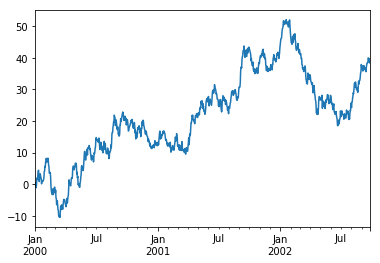

In [87]:
ts.plot()

On DataFrame, [plot()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html#pandas.DataFrame.plot) is a convenience to plot all of the columns with labels:

In [88]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [89]:
df = df.cumsum()

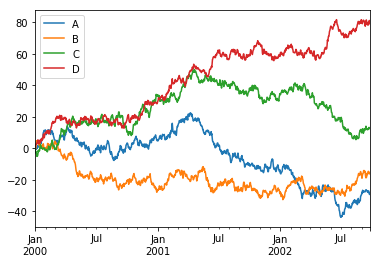

In [90]:
plt.figure(); df.plot(); plt.legend(loc='best')

## Getting Data In/Out 

### CSV

Writing to CSV format

The Series and DataFrame objects have an instance method to_csv which allows storing the contents of the object as a comma-separated-values file. The function takes a number of arguments. Only the first is required.

        path_or_buf: A string path to the file to write or a StringIO
        sep : Field delimiter for the output file (default ”,”)
        na_rep: A string representation of a missing value (default ‘’)
        float_format: Format string for floating point numbers
        cols: Columns to write (default None)
        header: Whether to write out the column names (default True)
        index: whether to write row (index) names (default True)
        index_label: Column label(s) for index column(s) if desired. If None (default), and header and index are True, then the index names are used. (A sequence should be given if the DataFrame uses MultiIndex).
        mode : Python write mode, default ‘w’
        encoding: a string representing the encoding to use if the contents are non-ASCII, for python versions prior to 3
        line_terminator: Character sequence denoting line end (default ‘\n’)
        quoting: Set quoting rules as in csv module (default csv.QUOTE_MINIMAL). Note that if you have set a float_format then floats are converted to strings and csv.QUOTE_NONNUMERIC will treat them as non-numeric
        quotechar: Character used to quote fields (default ‘”’)
        doublequote: Control quoting of quotechar in fields (default True)
        escapechar: Character used to escape sep and quotechar when appropriate (default None)
        chunksize: Number of rows to write at a time
        tupleize_cols: If False (default), write as a list of tuples, otherwise write in an expanded line format suitable for read_csv
        date_format: Format string for datetime objects


[Writing to a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

In [91]:
df

,A,B,C,D
2000-01-01,-0.127297,-0.036697,-0.366001,0.859951
2000-01-02,-0.509426,-0.694011,-2.553637,1.790968
2000-01-03,0.936207,1.171523,-3.040390,2.020786
2000-01-04,-0.775132,2.334156,-2.428936,2.217549
2000-01-05,-0.381700,4.579322,-3.818270,2.925151
2000-01-06,0.031855,3.401856,-5.271056,2.914184
2000-01-07,-0.170904,4.649061,-4.835470,2.967669
2000-01-08,0.813577,4.437420,-4.969147,4.212718
2000-01-09,1.790477,3.617887,-3.938806,5.250009
2000-01-10,0.897555,3.791072,-1.499658,4.960802


In [92]:
df.to_csv('foo.csv')
#!ls -la foo.csv

In [95]:
pwd()

'/home/brijesh/Documents/Data Science Academy/DSAFC2019Feb23/Python/NumPy, SKlearn etc'

In [93]:
#cat foo.csv

,A,B,C,D
2000-01-01,-0.12729701591346138,-0.03669657443555438,-0.3660014654187059,0.859950567644321
2000-01-02,-0.5094259726440629,-0.6940112609685557,-2.553637289918653,1.790968499714162
2000-01-03,0.9362066816915364,1.171522526682892,-3.040389740920724,2.020786303713344
2000-01-04,-0.7751315441587232,2.3341556672120936,-2.428936203920877,2.217549396643502
2000-01-05,-0.3817003041345026,4.579322080200648,-3.818269578910137,2.925150727368319
2000-01-06,0.03185549639950214,3.4018560228111605,-5.2710562028210886,2.9141843352728674
2000-01-07,-0.1709035830911691,4.649061299045249,-4.835469541587816,2.9676688551253876
2000-01-08,0.8135774124557471,4.437419503777769,-4.969146592661576,4.212718456038852
2000-01-09,1.7904766738784108,3.617887063005445,-3.9388062139807105,5.2500085455102
2000-01-10,0.897554825336113,3.791071881344406,-1.4996580873911327,4.9608018799396305
2000-01-11,0.7342714499252001,2.6103513051417195,-2.356968850644441,3.63097805802529
2000-01-12,3.650876884183165,1.8374838

In [96]:
#(df.A+df.B)/5

The two workhorse functions for reading text files (a.k.a. flat files) are read_csv() and read_table(). They both use the same parsing code to intelligently convert tabular data into a DataFrame object. See the cookbook for some advanced strategies.

[Reading from a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)

In [305]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.276466,1.508149,-0.004353,1.005216
1,2000-01-02,-1.063518,0.169168,-0.486092,0.730616
2,2000-01-03,-2.057501,0.999597,0.052878,1.823356
3,2000-01-04,-1.879145,0.338128,-0.800917,2.973871
4,2000-01-05,-2.248119,2.294348,-1.520508,4.578526
5,2000-01-06,-1.452117,2.175981,-0.566876,5.138843
6,2000-01-07,-1.203629,3.507788,-0.329449,3.980121
7,2000-01-08,-1.904816,3.812790,1.185672,3.435628
8,2000-01-09,-2.070088,2.248446,0.388254,4.328378
9,2000-01-10,-1.519811,2.047381,1.587393,4.613047


In [306]:
newdf=pd.read_csv('foo.csv', index_col=0)

In [307]:
newdf

,A,B,C,D
2000-01-01,-1.276466,1.508149,-0.004353,1.005216
2000-01-02,-1.063518,0.169168,-0.486092,0.730616
2000-01-03,-2.057501,0.999597,0.052878,1.823356
2000-01-04,-1.879145,0.338128,-0.800917,2.973871
2000-01-05,-2.248119,2.294348,-1.520508,4.578526
2000-01-06,-1.452117,2.175981,-0.566876,5.138843
2000-01-07,-1.203629,3.507788,-0.329449,3.980121
2000-01-08,-1.904816,3.812790,1.185672,3.435628
2000-01-09,-2.070088,2.248446,0.388254,4.328378
2000-01-10,-1.519811,2.047381,1.587393,4.613047


In [293]:
df

,A,B,C,D
2000-01-01,-1.276466,1.508149,-0.004353,1.005216
2000-01-02,-1.063518,0.169168,-0.486092,0.730616
2000-01-03,-2.057501,0.999597,0.052878,1.823356
2000-01-04,-1.879145,0.338128,-0.800917,2.973871
2000-01-05,-2.248119,2.294348,-1.520508,4.578526
2000-01-06,-1.452117,2.175981,-0.566876,5.138843
2000-01-07,-1.203629,3.507788,-0.329449,3.980121
2000-01-08,-1.904816,3.812790,1.185672,3.435628
2000-01-09,-2.070088,2.248446,0.388254,4.328378
2000-01-10,-1.519811,2.047381,1.587393,4.613047


In [97]:
?pd.read_csv

### HDF5

Reading and writing to [HDFStores](http://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)

HDF5 on Wikipedia: [HDF5 Wiki](https://en.wikipedia.org/wiki/Hierarchical_Data_Format)

Writing to a HDF5 Store

In [99]:
df.to_hdf('foo.h5','df')

Reading from a HDF5 Store

In [309]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,-1.276466,1.508149,-0.004353,1.005216
2000-01-02,-1.063518,0.169168,-0.486092,0.730616
2000-01-03,-2.057501,0.999597,0.052878,1.823356
2000-01-04,-1.879145,0.338128,-0.800917,2.973871
2000-01-05,-2.248119,2.294348,-1.520508,4.578526
2000-01-06,-1.452117,2.175981,-0.566876,5.138843
2000-01-07,-1.203629,3.507788,-0.329449,3.980121
2000-01-08,-1.904816,3.812790,1.185672,3.435628
2000-01-09,-2.070088,2.248446,0.388254,4.328378
2000-01-10,-1.519811,2.047381,1.587393,4.613047


In [310]:
?pd.read_csv

### Excel

Excel files

The read_excel() method can read Excel 2003 (.xls) and Excel 2007+ (.xlsx) files using the xlrd Python module. The to_excel() instance method is used for saving a DataFrame to Excel. Generally the semantics are similar to working with csv data

Reading and writing to [MS Excel](http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel)

Writing to an excel file

In [311]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Reading from an excel file

In [ ]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

In [ ]:
df.sort_values("A", ascending=False)[:3]

In [ ]:
df.nlargest(3,"A")

In [ ]:
!pip3 install tables --upgrade -U

In [ ]:
!pip3 install numpy -U

In [313]:
import pickle

In [314]:
myfile=open("df.pkl", "wb")

In [315]:
pickle.dump(df, myfile)

In [318]:
myfile.close()

In [319]:
myfile=open("df.pkl", "rb")

In [321]:
dfNew=pickle.load(myfile)

In [322]:
dfNew

,A,B,C,D
2000-01-01,-1.276466,1.508149,-0.004353,1.005216
2000-01-02,-1.063518,0.169168,-0.486092,0.730616
2000-01-03,-2.057501,0.999597,0.052878,1.823356
2000-01-04,-1.879145,0.338128,-0.800917,2.973871
2000-01-05,-2.248119,2.294348,-1.520508,4.578526
2000-01-06,-1.452117,2.175981,-0.566876,5.138843
2000-01-07,-1.203629,3.507788,-0.329449,3.980121
2000-01-08,-1.904816,3.812790,1.185672,3.435628
2000-01-09,-2.070088,2.248446,0.388254,4.328378
2000-01-10,-1.519811,2.047381,1.587393,4.613047


In [323]:
df.to_pickle("dfNew.pkl")

In [325]:
from joblib import dump, load

In [326]:
dump(df, "dfJBLLIB.pkl")

['dfJBLLIB.pkl']

In [327]:
load("dfJBLLIB.pkl")

,A,B,C,D
2000-01-01,-1.276466,1.508149,-0.004353,1.005216
2000-01-02,-1.063518,0.169168,-0.486092,0.730616
2000-01-03,-2.057501,0.999597,0.052878,1.823356
2000-01-04,-1.879145,0.338128,-0.800917,2.973871
2000-01-05,-2.248119,2.294348,-1.520508,4.578526
2000-01-06,-1.452117,2.175981,-0.566876,5.138843
2000-01-07,-1.203629,3.507788,-0.329449,3.980121
2000-01-08,-1.904816,3.812790,1.185672,3.435628
2000-01-09,-2.070088,2.248446,0.388254,4.328378
2000-01-10,-1.519811,2.047381,1.587393,4.613047


In [100]:
!pip install tables -U

  Could not find a version that satisfies the requirement table898s (from versions: )
No matching distribution found for table898s
You are using pip version 9.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
